# Import necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt

### Load the Dataset

In [24]:
data = pd.read_csv("climate_nasa.csv")
data

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [26]:
data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [27]:
# Finding Nulls in dataset
data.isnull().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [21]:
# Dropping Nulls from dataset
data1 = data.dropna()

In [22]:
# Checking Nulls in dataset
data1.isnull().sum()

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64

In [28]:
# Converting 'date' to datetime objects and extracts features
data1["date"] = pd.to_datetime(data1["date"])

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\3256349208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["date"] = pd.to_datetime(data1["date"])


In [29]:
data1["year"] = data1["date"].dt.year

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\2665138286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["year"] = data1["date"].dt.year


In [30]:
data1["month"] = data1["date"].dt.month

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\330827914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["month"] = data1["date"].dt.month


In [31]:
data1["day_of_week"] = data1["date"].dt.dayofweek

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\3505427353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["day_of_week"] = data1["date"].dt.dayofweek


In [32]:
data1["hour"] = data1["date"].dt.hour

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\2051755506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["hour"] = data1["date"].dt.hour


In [33]:
data1

,date,likesCount,profileName,commentsCount,text,year,month,day_of_week,hour
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022,9,2,17
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",2022,9,2,19
5,2022-09-15 17:10:57+00:00,4,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,1.0,Excellent example...very relatable to the Gen ...,2022,9,3,17
7,2022-09-07 18:07:53+00:00,1,39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...,21.0,Has the Earth ever had a concentration of over...,2022,9,2,18
9,2022-09-07 16:30:55+00:00,4,31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...,8.0,Historical co2 data would make it an interesti...,2022,9,2,16
...,...,...,...,...,...,...,...,...,...
508,2022-12-22 19:39:27+00:00,3,8a692ab6e9060b4f277242c2cdf8f47ab693f8617fb654...,7.0,The world's population has been increasing too...,2022,12,3,19
511,2022-12-22 17:55:09+00:00,3,a4aa0bb4111f610ebbc6ef613d9a661cd0e86b225ac279...,3.0,Then don’t use some very hot days in the summe...,2022,12,3,17
514,2022-12-22 17:46:40+00:00,1,9b258413c341e888a881b4df7c7885365c9041ee97834f...,2.0,Thank you.\nDo you happen to have a global tem...,2022,12,3,17
518,2022-12-22 17:19:51+00:00,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...,2022,12,3,17


In [34]:
# Handling missing 'commentsCounts' by filling with 0
data1["commentsCounts"] = data1["commentsCount"].fillna(0).astype(int)

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\950364898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["commentsCounts"] = data1["commentsCount"].fillna(0).astype(int)


In [35]:
data1

,date,likesCount,profileName,commentsCount,text,year,month,day_of_week,hour,commentsCounts
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022,9,2,17,3
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",2022,9,2,19,26
5,2022-09-15 17:10:57+00:00,4,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,1.0,Excellent example...very relatable to the Gen ...,2022,9,3,17,1
7,2022-09-07 18:07:53+00:00,1,39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...,21.0,Has the Earth ever had a concentration of over...,2022,9,2,18,21
9,2022-09-07 16:30:55+00:00,4,31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...,8.0,Historical co2 data would make it an interesti...,2022,9,2,16,8
...,...,...,...,...,...,...,...,...,...,...
508,2022-12-22 19:39:27+00:00,3,8a692ab6e9060b4f277242c2cdf8f47ab693f8617fb654...,7.0,The world's population has been increasing too...,2022,12,3,19,7
511,2022-12-22 17:55:09+00:00,3,a4aa0bb4111f610ebbc6ef613d9a661cd0e86b225ac279...,3.0,Then don’t use some very hot days in the summe...,2022,12,3,17,3
514,2022-12-22 17:46:40+00:00,1,9b258413c341e888a881b4df7c7885365c9041ee97834f...,2.0,Thank you.\nDo you happen to have a global tem...,2022,12,3,17,2
518,2022-12-22 17:19:51+00:00,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...,2022,12,3,17,5


In [38]:
# Cleaning text : removing non-alphanumeric characters and convert to lowercase
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]','',text)
        return text.lower().strip()
    return "" 


In [39]:
data1["cleaned_text"] = data1["text"].apply(clean_text)

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\3255202686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["cleaned_text"] = data1["text"].apply(clean_text)


In [45]:
# Sentimental Analysis
!pip install textblob
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 8.5 MB/s eta 0:00:01
   --------------------------------- ------ 524.3/624.3 kB 8.5 MB/s eta 0:00:01
   --------------------------------- ------ 524.3/624.3 kB 8.5 MB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 594.6 kB/s eta 0:00:00


In [46]:
data1["sentiment_polarity"] = data1["cleaned_text"].apply(get_sentiment)

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\448864453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["sentiment_polarity"] = data1["cleaned_text"].apply(get_sentiment)


In [48]:
data1.head(5)

,date,likesCount,profileName,commentsCount,text,year,month,day_of_week,hour,commentsCounts,cleaned_text,sentiment_polarity
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022,9,2,17,3,does the coghg in the troposphere affect the s...,0.000
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",2022,9,2,19,26,yes and carbon dioxide does not harm the earth...,-0.375
5,2022-09-15 17:10:57+00:00,4,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,1.0,Excellent example...very relatable to the Gen ...,2022,9,3,17,1,excellent examplevery relatable to the gen pop...,0.350
7,2022-09-07 18:07:53+00:00,1,39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...,21.0,Has the Earth ever had a concentration of over...,2022,9,2,18,21,has the earth ever had a concentration of over...,0.000
9,2022-09-07 16:30:55+00:00,4,31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...,8.0,Historical co2 data would make it an interesti...,2022,9,2,16,8,historical co data would make it an interestin...,0.250


In [50]:
# Keyword Presence(example keywords related to climate change)
keywords = ["climate change","global warming","co2","emissions","fossil fuels","sea level","ice age","warming","hotter","cooler"]
for keyword in keywords:
    data1[f'has_{keyword.replace(" ","_")}'] = data1["cleaned_text"].apply(lambda x:1 if keyword in x else 0)
    

C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\1608575733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[f'has_{keyword.replace(" ","_")}'] = data1["cleaned_text"].apply(lambda x:1 if keyword in x else 0)
C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\1608575733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[f'has_{keyword.replace(" ","_")}'] = data1["cleaned_text"].apply(lambda x:1 if keyword in x else 0)
C:\Users\Kashyap AK\AppData\Local\Temp\ipykernel_30056\160857573

In [51]:
# Droping original 'date' and 'text' columns, and 'profileName' as it is anonymized
data1_processed = data1.drop(columns = ["date","text","profileName","cleaned_text"])

In [56]:
# --- Target Variable Identification ---
# target variable: likesCount
# Features: all other numerical and engineered columns
# Define features (X) and target (y)
X = data1_processed.drop(columns=["likesCount"])
y = data1_processed["likesCount"]

In [57]:
# Aligning columns after one-hot encoding (if any categorical features were present, which they are not after dropping profileName)
# For now, ensure all features are numeric.
# If there were other categorical columns, we would use pd.get_dummies(X) here.

In [58]:
# --- Model Selection ---
# Using RandomForestRegressor for predicting likeCounts

In [61]:
# --- Model Training And Evalution
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [63]:
# Initializing and training the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [65]:
# Make predictions
y_pred = model.predict(X_test)

In [69]:
# Evalute the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evalution:")
print(f"Mean Absolute Error (MAE):{mae:.2f} ")
print(f"R-squared (R2): {r2:.2f}")


Model Evalution:
Mean Absolute Error (MAE):8.27 
R-squared (R2): 0.03


In [70]:
# --- Interpretation---

In [71]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:")
print(feature_importances.head(10))


Top 10 Feature Importances:
commentsCount         0.223759
sentiment_polarity    0.212168
commentsCounts        0.177564
hour                  0.121176
has_climate_change    0.066116
day_of_week           0.063771
year                  0.050862
month                 0.035749
has_ice_age           0.021786
has_warming           0.015123
dtype: float64


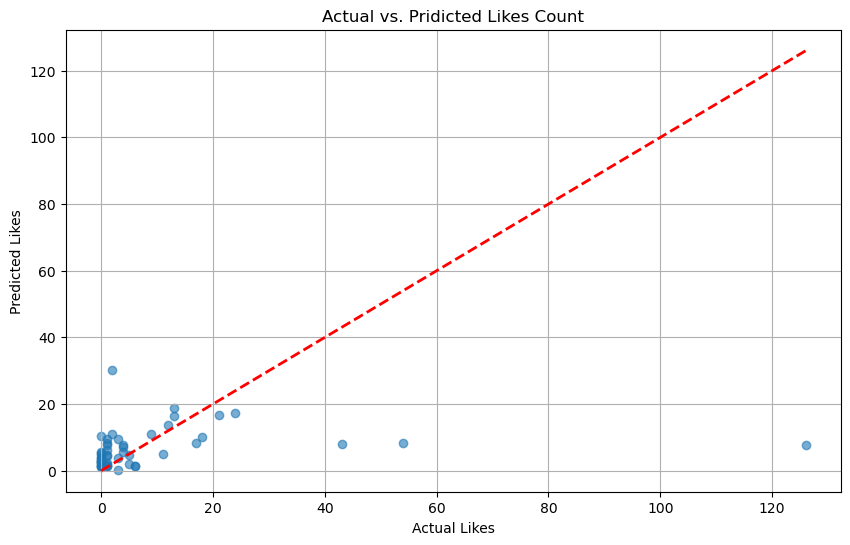

In [72]:
# Visulizing actual vs. predicted likes (for a subset to keep it readable)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(), y.max()],'r--', lw=2)
plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Actual vs. Pridicted Likes Count")
plt.grid(True)
plt.show()

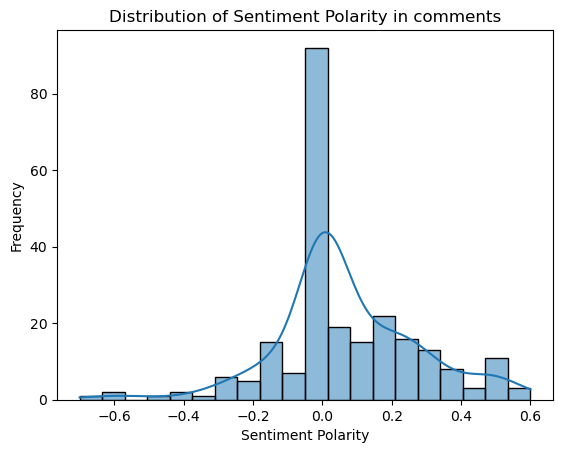

In [74]:
# Distribution of Sentimental Polarity
plt.figure(figure=(8,5))
sns.histplot(data1["sentiment_polarity"], bins=20, kde=True)
plt.title("Distribution of Sentiment Polarity in comments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [81]:
# Average likes for comments containing specific keywords
keyword_likes = {}
for keyword in keywords:
    col_name = f"has_{keyword.replace(" ","_")}"
    if col_name in data1_processed.columns:
        avg_likes = data1_processed[data1_processed[col_name] == 1]["likesCount"].mean()
        keyword_likes[keyword] = avg_likes

print("\nAverage Likes for Comments Containing Specific Keywords:")
for k,v in sorted(keyword_likes.items(), key=lambda item: item[1], reverse=True):
    print(f"-{k}: {v:.2f} average likes")


Average Likes for Comments Containing Specific Keywords:
-co2: nan average likes
-ice age: 19.00 average likes
-hotter: 15.00 average likes
-warming: 11.08 average likes
-climate change: 9.97 average likes
-global warming: 9.31 average likes
-sea level: 4.25 average likes
-emissions: 2.43 average likes
-fossil fuels: 2.00 average likes
-cooler: 2.00 average likes
